In [58]:
import pandas as pd
import numpy as np
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import classification_report
from sklearn.preprocessing import StandardScaler
import seaborn as sns
import re
import nltk
import string
from nltk.stem import WordNetLemmatizer
from nltk.stem import PorterStemmer
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import LinearSVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from nltk.sentiment import SentimentIntensityAnalyzer
from gensim.corpora import Dictionary
from gensim.models.ldamulticore import LdaMulticore
from gensim.models.coherencemodel import CoherenceModel
import plotly.express as px
from collections import Counter

In [3]:
df = pd.read_csv('/Users/ritaguan/Desktop/nb_py.csv')

Naive Bayes

In [5]:
#tfidf 
vectorizer = TfidfVectorizer (max_features=2500, min_df=7, max_df=0.8, stop_words='english')
processed_features = vectorizer.fit_transform(df['lemmas_back_to_text']).toarray()
X_train, X_test, y_train, y_test = train_test_split(processed_features, df['label'], test_size=0.2, random_state=0)

In [8]:
# Naive Bayes Classifier
nb_classifier = MultinomialNB()
nb_classifier.fit(X_train, y_train)
nb_predictions = nb_classifier.predict(X_test)
nb_accuracy = accuracy_score(y_test, nb_predictions)
print(confusion_matrix(y_test,nb_predictions))
print(classification_report(y_test,nb_predictions))
print(accuracy_score(y_test, nb_predictions))

[[6 0 0]
 [2 3 0]
 [2 0 1]]
              precision    recall  f1-score   support

          -1       0.60      1.00      0.75         6
           0       1.00      0.60      0.75         5
           1       1.00      0.33      0.50         3

    accuracy                           0.71        14
   macro avg       0.87      0.64      0.67        14
weighted avg       0.83      0.71      0.70        14

0.7142857142857143


Random Baseline Model

In [9]:
#tfidf, train test data split
vectorizer = TfidfVectorizer (max_features=2500, min_df=7, max_df=0.8, stop_words='english')
processed_features = vectorizer.fit_transform(df['lemmas_back_to_text']).toarray()
X_train, X_test, y_train, y_test = train_test_split(processed_features, df['label'], test_size=0.2)

In [15]:
# Random Baseline Classifier
baseline_predict = LinearSVC(dual=False).fit(X_train,y_train).predict(X_test) 
print("CLASSIFICATION REPPORT: ", classification_report(y_test,baseline_predict))
cm = confusion_matrix(y_test, baseline_predict)

baseline_accuracy = accuracy_score(y_test, baseline_predict)

print(accuracy_score(y_test, baseline_predict))

CLASSIFICATION REPPORT:                precision    recall  f1-score   support

          -1       0.78      0.88      0.82         8
           0       1.00      0.80      0.89         5
           1       0.00      0.00      0.00         1

    accuracy                           0.79        14
   macro avg       0.59      0.56      0.57        14
weighted avg       0.80      0.79      0.79        14

0.7857142857142857


Decision Tree

In [39]:
#tfidf, train test data split
vectorizer = TfidfVectorizer (max_features=2500, min_df=7, max_df=0.8, stop_words='english')
processed_features = vectorizer.fit_transform(df['lemmas_back_to_text']).toarray()
X_train, X_test, y_train, y_test = train_test_split(processed_features, df['label'], test_size=0.2)

In [40]:
# Decision Tree Classifier
model = DecisionTreeClassifier()
model = model.fit(X_train, y_train)
yp_train = model.predict(X_train)
yp_test = model.predict(X_test)
tree_accuracy = accuracy_score(y_test, yp_test)

print(confusion_matrix(y_test,yp_test))
print(classification_report(y_test,yp_test))
print(accuracy_score(y_test, yp_test))

[[5 0 1]
 [0 3 0]
 [5 0 0]]
              precision    recall  f1-score   support

          -1       0.50      0.83      0.62         6
           0       1.00      1.00      1.00         3
           1       0.00      0.00      0.00         5

    accuracy                           0.57        14
   macro avg       0.50      0.61      0.54        14
weighted avg       0.43      0.57      0.48        14

0.5714285714285714


SVM

In [42]:
#tfidf, train test data split
vectorizer = TfidfVectorizer (max_features=2500, min_df=7, max_df=0.8, stop_words='english')
processed_features = vectorizer.fit_transform(df['sentiment_tokens']).toarray()
X_train, X_test, y_train, y_test = train_test_split(processed_features,df['label'], test_size=0.2)

In [43]:
# SVM classifier
model = SVC()
model.fit(X_train,y_train)
yp_train = model.predict(X_train)
yp_test = model.predict(X_test)
svm_accuracy = accuracy_score(y_test, yp_test)

print(confusion_matrix(y_test,yp_test))
print(classification_report(y_test,yp_test))
print(accuracy_score(y_test, yp_test))

[[5 0 0]
 [5 2 0]
 [2 0 0]]
              precision    recall  f1-score   support

          -1       0.42      1.00      0.59         5
           0       1.00      0.29      0.44         7
           1       0.00      0.00      0.00         2

    accuracy                           0.50        14
   macro avg       0.47      0.43      0.34        14
weighted avg       0.65      0.50      0.43        14

0.5


/Users/ritaguan/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/ritaguan/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/ritaguan/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Text(0.5, 1.0, 'Accuracy with Different Models')

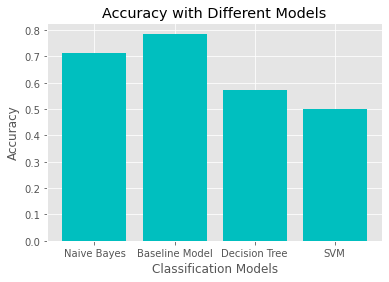

In [44]:
#Box Plot to compare accuracy of models
plt.style.use('ggplot')

x = ['Naive Bayes', 'Baseline Model', 'Decision Tree', 'SVM']
Elapsed_Time = [nb_accuracy, baseline_accuracy, tree_accuracy, svm_accuracy]
plt.bar(x, Elapsed_Time, color='c')
plt.xlabel("Classification Models")
plt.ylabel("Accuracy")
plt.title("Accuracy with Different Models")

In [97]:
# sentiment analysis of tricky sentences 
sid = SentimentIntensityAnalyzer()

tricky_sentences = df['lemmas_back_to_text'].head(4)
sid = SentimentIntensityAnalyzer()

for sentence in tricky_sentences:
    print(sentence)
    ss = sid.polarity_scores(sentence)
    for k in sorted(ss):
        print('{0}: {1}, '.format(k, ss[k]))
    print("\n")

rt @dvdmckay new paper tippingpoint @sciencemagazine exceed 1.5 ° c global warming trigger multip
compound: 0.1531, 
neg: 0.0, 
neu: 0.873, 
pos: 0.127, 


rt @deathball13 let forget good old charliechester propaganda machine @cnn climatechange fakenew democratsaredestroyin
compound: -0.0, 
neg: 0.232, 
neu: 0.595, 
pos: 0.173, 


rt @energylivenews prime minister liz truss announce measure today energy bill freeze £ 2,500 fight energy c
compound: 0.2023, 
neg: 0.137, 
neu: 0.579, 
pos: 0.284, 


rt @energyhouseva energy crisis short live reap climatechange environment sustai
compound: -0.4588, 
neg: 0.289, 
neu: 0.563, 
pos: 0.148, 




In [94]:
tricky_sentences = df['lemmas_back_to_text']
sid = SentimentIntensityAnalyzer()

for sentence in tricky_sentences:
    ss = sid.polarity_scores(sentence)
    for k in sorted(ss):
        result = {k, ss[k]}




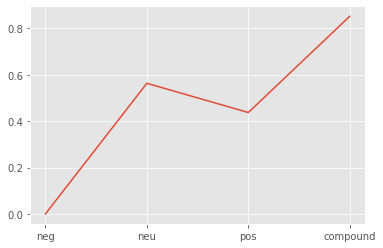

In [95]:
x = list(ss.keys())           
y = list(ss.values())        
plt.plot(x, y)